<a href="https://colab.research.google.com/github/pawel0508/MachineLearningBootcamp_I/blob/master/LasyLosowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lasy losowe

Lasy losowe to połączenie wielu modeli drzew decyzyjnych. 

### Las losowy
- las losowy to wiele drzew decyzyjnych, które łącznie podejmują decyzję co do kwalifikacji
- lasy losowe to takie zespoły drzew decyzyjnych, gdzie każde drzewo daje klasę i klasa z największą liczbą głosów jest klasą prognozowaną przez model

### Schemat działania lasu losowego:
1. Wybór losowych próbek z danych
2. Budowa drzewa decyzyjnego dla każdej próbki 
3. Głosowanie większości dla przewidzianych klas 
4. Klasa z największą liczbą głosów jest predykcją modelu

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

sns.set(font_scale = 1.3)
np.random.seed(42)


In [8]:
from sklearn.datasets import load_iris

raw_data = load_iris()
raw_data


{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [9]:
dane = raw_data.copy()
data = dane['data']
target = dane['target']
feature_names = dane['feature_names']
target_names = dane['target_names']

df = pd.DataFrame(np.c_[data, target], columns = feature_names + ['target'])
df[:10]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [11]:
data = data[:,[0,1]]
target = df['target'].apply(int).values

In [12]:
print(f'{data[:5]}\n')
print(f'{target[:5]}')

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]]

[0 0 0 0 0]


Las losowy


In [14]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100)

classifier.fit(data, target)
classifier.score(data, target)

0.9266666666666666

/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning:

Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.



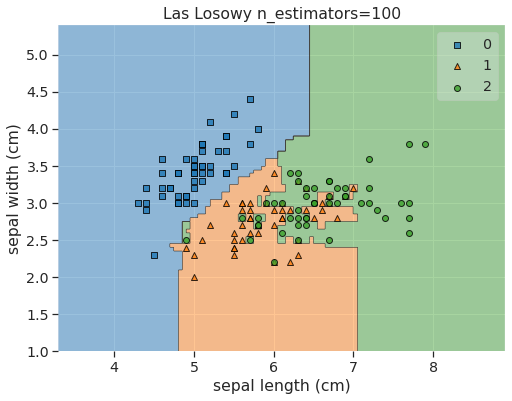

In [17]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize= (8, 6))
plot_decision_regions(data, target, classifier)
plt.title('Las Losowy n_estimators=100')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.show()

Wszystkie cechy

In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(dane['data'], dane['target'])

In [19]:
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (112, 4)
x_test shape: (38, 4)
y_train shape: (112,)
y_test shape: (38,)


In [27]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(x_train, y_train)
classifier.score(x_train, y_train)

1.0

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
accuracy_score(y_test, classifier.predict(x_test))

0.9736842105263158

In [30]:
classifier.feature_importances_

array([0.11019641, 0.0228563 , 0.43161296, 0.43533433])

In [31]:
features = pd.DataFrame(data = {'feature' : feature_names, 'feature_importances' : classifier.feature_importances_})

In [34]:
px.bar(features, x = 'feature', y = 'feature_importances', width = 700, height = 400)

In [33]:
features

,feature,feature_importances
0,sepal length (cm),0.110196
1,sepal width (cm),0.022856
2,petal length (cm),0.431613
3,petal width (cm),0.435334
